# Fake Covid News Detection

## Import Data

In [1]:
import pandas as pd;
import re;
import os

if not os.path.exists('unclean'):
    os.makedirs('unclean')

test_df = pd.read_csv("unclean/Constraint_Test.csv");
train_df = pd.read_csv("unclean/Constraint_Train.csv");
val_df = pd.read_csv("unclean/Constraint_Val.csv");

In [2]:
test_df

,id,tweet
0,1,Our daily update is published. States reported...
1,2,Alfalfa is the only cure for COVID-19.
2,3,President Trump Asked What He Would Do If He W...
3,4,States reported 630 deaths. We are still seein...
4,5,This is the sixth time a global health emergen...
...,...,...
2135,2136,#CoronaVirusUpdates: State-wise details of Tot...
2136,2137,Tonight 12(midnight) onwards Disaster Manageme...
2137,2138,296 new cases of #COVID19Nigeria; Plateau-85 E...
2138,2139,RT @CDCemergency: #DYK? @CDCgov’s One-Stop Sho...


In [3]:
train_df

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real
...,...,...,...
6415,6416,A tiger tested positive for COVID-19 please st...,fake
6416,6417,???Autopsies prove that COVID-19 is??� a blood...,fake
6417,6418,_A post claims a COVID-19 vaccine has already ...,fake
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,fake


In [4]:
val_df

,id,tweet,label
0,1,Chinese converting to Islam after realising th...,fake
1,2,11 out of 13 people (from the Diamond Princess...,fake
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",fake
3,4,Mike Pence in RNC speech praises Donald Trump’...,fake
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,real
...,...,...,...
2135,2136,Donald Trump wrongly claimed that New Zealand ...,fake
2136,2137,Current understanding is #COVID19 spreads most...,real
2137,2138,Nothing screams “I am sat around doing fuck al...,fake
2138,2139,Birx says COVID-19 outbreak not under control ...,fake


# Explorative data analysis

In [5]:
print("Uncleaned Test Data: "+ str(test_df.shape))
print("Uncleaned Train Data: "+ str(train_df.shape))
print("Uncleaned Validate Data: " + str(val_df.shape))

Uncleaned Test Data: (2140, 2)
Uncleaned Train Data: (6420, 3)
Uncleaned Validate Data: (2140, 3)


In [6]:
print("Uncleaned Test Data: "+ str(test_df.columns))
print("Uncleaned Train Data: "+ str(train_df.columns))
print("Uncleaned Validate Data: " + str(val_df.columns))

Uncleaned Test Data: Index(['id', 'tweet'], dtype='object')
Uncleaned Train Data: Index(['id', 'tweet', 'label'], dtype='object')
Uncleaned Validate Data: Index(['id', 'tweet', 'label'], dtype='object')


In [7]:
test_df.info()
print('\n')
train_df.info()
print('\n')
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2140 non-null   int64 
 1   tweet   2140 non-null   object
dtypes: int64(1), object(1)
memory usage: 33.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6420 non-null   int64 
 1   tweet   6420 non-null   object
 2   label   6420 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.6+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2140 non-null   int64 
 1   tweet   2140 non-null   object
 2   label   2140 non-null   object
dtypes: int64(1), object(2)
memory usage: 50.3+ KB


# Data Preprocessing

## Convert to lowercase

In [8]:
train_df['tweet'] = train_df['tweet'].str.lower()
test_df['tweet'] = test_df['tweet'].str.lower()
val_df['tweet'] = val_df['tweet'].str.lower()
print(train_df.head())
print(test_df.head())
print(val_df.head())


   id                                              tweet label
0   1  the cdc currently reports 99031 deaths. in gen...  real
1   2  states reported 1121 deaths a small rise from ...  real
2   3  politically correct woman (almost) uses pandem...  fake
3   4  #indiafightscorona: we have 1524 #covid testin...  real
4   5  populous states can generate large case counts...  real
   id                                              tweet
0   1  our daily update is published. states reported...
1   2             alfalfa is the only cure for covid-19.
2   3  president trump asked what he would do if he w...
3   4  states reported 630 deaths. we are still seein...
4   5  this is the sixth time a global health emergen...
   id                                              tweet label
0   1  chinese converting to islam after realising th...  fake
1   2  11 out of 13 people (from the diamond princess...  fake
2   3  covid-19 is caused by a bacterium, not virus a...  fake
3   4  mike pence in rnc spe

## Check Duplicates

In [9]:
train_duplicates = train_df[train_df.duplicated(subset=['tweet'], keep=False)]
print("Duplicates in train_df:")
print(train_duplicates)


test_duplicates = test_df[test_df.duplicated(subset=['tweet'], keep=False)]
print("\nDuplicates in test_df:")
print(test_duplicates)


val_duplicates = val_df[val_df.duplicated(subset=['tweet'], keep=False)]
print("\nDuplicates in val_df:")
print(val_duplicates)

common_tweets_train_test = pd.merge(train_df, test_df, on='tweet', how='inner')
print("\nCommon tweets in train and test sets:")
print(common_tweets_train_test)

common_tweets_train_val = pd.merge(train_df, val_df, on='tweet', how='inner')
print("\nCommon tweets in train and validation sets:")
print(common_tweets_train_val)

common_tweets_test_val = pd.merge(test_df, val_df, on='tweet', how='inner')
print("\nCommon tweets in test and validation sets:")
common_tweets_test_val


Duplicates in train_df:
Empty DataFrame
Columns: [id, tweet, label]
Index: []

Duplicates in test_df:
Empty DataFrame
Columns: [id, tweet]
Index: []

Duplicates in val_df:
Empty DataFrame
Columns: [id, tweet, label]
Index: []

Common tweets in train and test sets:
   id_x                                              tweet label  id_y
0  3242  audio from whatsapp in which the head of cardi...  fake   132
1  4178  video shows muslim women spitting in plastic b...  fake  1829

Common tweets in train and validation sets:
   id_x                                              tweet label_x  id_y  \
0  5459  our combined total of confirmed and probable c...    real   910   

  label_y  
0    real  

Common tweets in test and validation sets:


,id_x,tweet,id_y,label


## Check Missing Values

In [10]:
print("Missing values in test_df:\n", test_df.isnull().sum())
print("\nMissing values in train_df:\n", train_df.isnull().sum())
print("\nMissing values in val_df:\n", val_df.isnull().sum())


Missing values in test_df:
 id       0
tweet    0
dtype: int64

Missing values in train_df:
 id       0
tweet    0
label    0
dtype: int64

Missing values in val_df:
 id       0
tweet    0
label    0
dtype: int64


## Categorical Values Count

In [11]:
val_df.label.value_counts()

label
real    1120
fake    1020
Name: count, dtype: int64

In [12]:
train_df.label.value_counts()

label
real    3360
fake    3060
Name: count, dtype: int64

## Remove extra whitespaces and line break

In [13]:
def count_extra_whitespace_and_linebreaks(df, column_name):
    extra_spaces_count = 0
    linebreaks_count = 0

    for index, row in df.iterrows():
        tweet = row[column_name]
        # Check for extra spaces (more than one space together)
        extra_spaces_count += len([i for i in tweet.split() if len(i) == 0])

        # Check for linebreaks
        linebreaks_count += tweet.count('\n')

    return extra_spaces_count, linebreaks_count

extra_spaces_test, linebreaks_test = count_extra_whitespace_and_linebreaks(test_df, 'tweet')
extra_spaces_train, linebreaks_train = count_extra_whitespace_and_linebreaks(train_df, 'tweet')
extra_spaces_val, linebreaks_val = count_extra_whitespace_and_linebreaks(val_df, 'tweet')

print("Test DataFrame:")
print(f"Extra spaces: {extra_spaces_test}")
print(f"Line breaks: {linebreaks_test}")

print("\nTrain DataFrame:")
print(f"Extra spaces: {extra_spaces_train}")
print(f"Line breaks: {linebreaks_train}")

print("\nValidation DataFrame:")
print(f"Extra spaces: {extra_spaces_val}")
print(f"Line breaks: {linebreaks_val}")


Test DataFrame:
Extra spaces: 0
Line breaks: 288

Train DataFrame:
Extra spaces: 0
Line breaks: 778

Validation DataFrame:
Extra spaces: 0
Line breaks: 239


In [14]:
import re

def clean_text(text):
  # Remove extra whitespaces
  text = re.sub(r'\s+', ' ', text)
  # Remove leading/trailing whitespaces
  text = text.strip()
  return text

train_df['tweet'] = train_df['tweet'].apply(clean_text)
test_df['tweet'] = test_df['tweet'].apply(clean_text)
val_df['tweet'] = val_df['tweet'].apply(clean_text)


In [15]:
# Recheck for extra whitespaces and line breaks after cleaning
extra_spaces_test, linebreaks_test = count_extra_whitespace_and_linebreaks(test_df, 'tweet')
extra_spaces_train, linebreaks_train = count_extra_whitespace_and_linebreaks(train_df, 'tweet')
extra_spaces_val, linebreaks_val = count_extra_whitespace_and_linebreaks(val_df, 'tweet')

print("\nAfter Cleaning:")
print("Test DataFrame:")
print(f"Extra spaces: {extra_spaces_test}")
print(f"Line breaks: {linebreaks_test}")

print("\nTrain DataFrame:")
print(f"Extra spaces: {extra_spaces_train}")
print(f"Line breaks: {linebreaks_train}")

print("\nValidation DataFrame:")
print(f"Extra spaces: {extra_spaces_val}")
print(f"Line breaks: {linebreaks_val}")



After Cleaning:
Test DataFrame:
Extra spaces: 0
Line breaks: 0

Train DataFrame:
Extra spaces: 0
Line breaks: 0

Validation DataFrame:
Extra spaces: 0
Line breaks: 0


## Normalize Multiple Punctuation into single punctuation

In [16]:
def count_multiple_punctuation(text):
    # Regular expression to find multiple punctuation marks together
    pattern = r'[^\w\s]{2,}'  # Matches 2 or more non-word, non-space characters
    matches = re.findall(pattern, text)
    return len(matches)

# Apply the function to the 'tweet' column of each DataFrame
train_df['multiple_punctuation_count'] = train_df['tweet'].apply(count_multiple_punctuation)
test_df['multiple_punctuation_count'] = test_df['tweet'].apply(count_multiple_punctuation)
val_df['multiple_punctuation_count'] = val_df['tweet'].apply(count_multiple_punctuation)

print(train_df.head())
print(test_df.head())
print(val_df.head())

# Example: Check the total count of multiple punctuations in train set
total_multiple_punctuation_train = train_df['multiple_punctuation_count'].sum()
print(f"\nTotal multiple punctuations in train_df: {total_multiple_punctuation_train}")


   id                                              tweet label  \
0   1  the cdc currently reports 99031 deaths. in gen...  real   
1   2  states reported 1121 deaths a small rise from ...  real   
2   3  politically correct woman (almost) uses pandem...  fake   
3   4  #indiafightscorona: we have 1524 #covid testin...  real   
4   5  populous states can generate large case counts...  real   

   multiple_punctuation_count  
0                           0  
1                           1  
2                           1  
3                           1  
4                           1  
   id                                              tweet  \
0   1  our daily update is published. states reported...   
1   2             alfalfa is the only cure for covid-19.   
2   3  president trump asked what he would do if he w...   
3   4  states reported 630 deaths. we are still seein...   
4   5  this is the sixth time a global health emergen...   

   multiple_punctuation_count  
0                 

In [17]:
def replace_excessive_punctuation(text):
    text = re.sub(r'([!?.]){2,}', r'\1', text)
    return text

train_df['tweet'] = train_df['tweet'].apply(replace_excessive_punctuation)
test_df['tweet'] = test_df['tweet'].apply(replace_excessive_punctuation)
val_df['tweet'] = val_df['tweet'].apply(replace_excessive_punctuation)


In [18]:
def check_multiple_punctuation(df):

    # Regular expression to find two or more punctuation marks together
    pattern = r'[!?.]{2,}'

    # Find tweets with multiple punctuation marks
    multiple_punctuation_tweets = df[df['tweet'].str.contains(pattern, regex=True)]

    if multiple_punctuation_tweets.empty:
        return None  # Return None if no such rows are found.
    else:
        return multiple_punctuation_tweets

multiple_punctuation_train = check_multiple_punctuation(train_df)

if multiple_punctuation_train is not None:
    print("Tweets in train_df with multiple punctuation marks:")
    print(multiple_punctuation_train)
else:
    print("No tweets in train_df with multiple punctuation marks.")

multiple_punctuation_test = check_multiple_punctuation(test_df)
if multiple_punctuation_test is not None:
    print("\nTweets in test_df with multiple punctuation marks:")
    print(multiple_punctuation_test)
else:
    print("\nNo tweets in test_df with multiple punctuation marks.")

multiple_punctuation_val = check_multiple_punctuation(val_df)
if multiple_punctuation_val is not None:
    print("\nTweets in val_df with multiple punctuation marks:")
    print(multiple_punctuation_val)
else:
    print("\nNo tweets in val_df with multiple punctuation marks.")


No tweets in train_df with multiple punctuation marks.

No tweets in test_df with multiple punctuation marks.

No tweets in val_df with multiple punctuation marks.


## Check Emoji Usage

In [19]:
def contains_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return bool(emoji_pattern.search(text))

train_df['contains_emoji'] = train_df['tweet'].apply(contains_emoji)
test_df['contains_emoji'] = test_df['tweet'].apply(contains_emoji)
val_df['contains_emoji'] = val_df['tweet'].apply(contains_emoji)

print(train_df[train_df['contains_emoji'] == True])
print(test_df[test_df['contains_emoji'] == True])
print(val_df[val_df['contains_emoji'] == True])


        id                                              tweet label  \
8        9  ?clearly, the obama administration did not lea...  fake   
15      16  as of 18 august 2020 8am till now there have b...  real   
48      49  schools are struggling to cope with a lack of ...  real   
60      61  as of today there are a total of 1339 @icmrdel...  real   
70      71  rt @surgeon_general: #dyk: #handwashing remain...  real   
...    ...                                                ...   ...   
6389  6390  📢#coronavirusupdates: 📍#covid19 india tracker ...  real   
6391  6392  the cdc ?adjusted the us covid deaths from 153...  fake   
6392  6393  ireland says that due to the coronavirus, anyo...  fake   
6394  6395  says donald trump tweeted, ?corona vaccine fro...  fake   
6416  6417  ?autopsies prove that covid-19 is?� a blood cl...  fake   

      multiple_punctuation_count  contains_emoji  
8                              2            True  
15                             1            T

## Classify URL Link

In [20]:
def replace_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub("<URL>", text)

train_df['tweet'] = train_df['tweet'].apply(replace_urls)
test_df['tweet'] = test_df['tweet'].apply(replace_urls)
val_df['tweet'] = val_df['tweet'].apply(replace_urls)


In [21]:
def count_url_occurrences(df):
    return df['tweet'].str.count('<URL>').sum()

train_url_count = count_url_occurrences(train_df)
test_url_count = count_url_occurrences(test_df)
val_url_count = count_url_occurrences(val_df)

print(f"Number of URLs in train_df: {train_url_count}")
print(f"Number of URLs in test_df: {test_url_count}")
print(f"Number of URLs in val_df: {val_url_count}")


Number of URLs in train_df: 4395
Number of URLs in test_df: 1496
Number of URLs in val_df: 1497


## Remove Special Character

In [22]:
def remove_special_chars(text):
    # Keep only letters, numbers, spaces, @ and #
    text = re.sub(r'[^\w\s@#]', '', text)
    return text

train_df['tweet'] = train_df['tweet'].apply(remove_special_chars)
test_df['tweet'] = test_df['tweet'].apply(remove_special_chars)
val_df['tweet'] = val_df['tweet'].apply(remove_special_chars)


# Export

In [23]:
if not os.path.exists('clean'):
    os.makedirs('clean')

train_df.to_csv('clean/train_cleaned.csv', index=False)
test_df.to_csv('clean/test_cleaned.csv', index=False)
val_df.to_csv('clean/val_cleaned.csv', index=False)

train_df.to_excel('clean/train_cleaned.xlsx', index=False)
test_df.to_excel('clean/test_cleaned.xlsx', index=False)
val_df.to_excel('clean/val_cleaned.xlsx', index=False)


# Tokenizer

In [24]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def tokenize_tweet(tweet):
    """Tokenizes a tweet and extracts the [CLS] token embedding from BERT."""
    inputs = tokenizer(tweet, return_tensors="pt", padding=True, truncation=True, max_length=128)
    
    with torch.no_grad():  # Disable gradient computation for efficiency
        outputs = model(**inputs)
    
    cls_embedding = outputs.last_hidden_state[:, 0, :]  # Extract [CLS] token representation
    return cls_embedding.numpy().flatten()  # Convert to 1D NumPy array

# Apply the function to the dataset
train_df['tweet_numerical'] = train_df['tweet'].apply(tokenize_tweet)
test_df['tweet_numerical'] = test_df['tweet'].apply(tokenize_tweet)
val_df['tweet_numerical'] = val_df['tweet'].apply(tokenize_tweet)


In [25]:
train_df.head(5)

,id,tweet,label,multiple_punctuation_count,contains_emoji,tweet_numerical
0,1,the cdc currently reports 99031 deaths in gene...,real,0,False,"[-0.13996461, 0.06287794, 0.24462132, -0.25544..."
1,2,states reported 1121 deaths a small rise from ...,real,1,False,"[-0.46223238, -0.15984914, 0.34944507, -0.0417..."
2,3,politically correct woman almost uses pandemic...,fake,1,False,"[-0.3389366, 0.021693483, -0.33708763, -0.0038..."
3,4,#indiafightscorona we have 1524 #covid testing...,real,1,False,"[-0.14517201, -0.15194315, 0.20590551, -0.1750..."
4,5,populous states can generate large case counts...,real,1,False,"[-0.31011504, 0.073943324, 0.23608635, 0.16543..."


# Feature Extraction

## Feature Matrix

In [26]:
import numpy as np

# Convert list of arrays into a NumPy feature matrix
X_train = np.vstack(train_df['tweet_numerical'].values)
X_val = np.vstack(val_df['tweet_numerical'].values)
X_test = np.vstack(test_df['tweet_numerical'].values)  # Test set has no labels

# Encode labels ('fake' -> 1, 'real' -> 0)
y_train = train_df['label'].map({'fake': 1, 'real': 0}).values
y_val = val_df['label'].map({'fake': 1, 'real': 0}).values


# Model Implementation & Results

## XGBoost Training with more hyperparameters


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize XGBoost classifier with GPU
xgb = XGBClassifier(
    tree_method="hist",  # Use GPU acceleration
    device="cuda",           # Specify CUDA device             
    max_bin=128,             # Reduce GPU memory usage
    n_jobs=1,                # Reduce CPU load (default: uses all cores) # Avoid deprecated warnings
    eval_metric="logloss"    # Set evaluation metric
)

# Grid search with cross-validation (uses multiple CPU cores)
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy', n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Train final model with best parameters (GPU enabled)
best_xgb = XGBClassifier(
    **grid_search.best_params_,
    tree_method="hist",
    device="cuda",
    n_jobs=1,  # Reduce CPU load
    eval_metric="logloss",
    early_stopping_rounds=10,
)


# Get feature importance from LightGBM model
feature_importance = best_xgb.feature_importances_

# Sort by importance and keep the top 50 features
top_features = np.argsort(feature_importance)[-50:]

# Use only the most important features
X_train_reduced = X_train[:, top_features]
X_val_reduced = X_val[:, top_features]
X_test_reduced = X_test[:, top_features]


# Train model with early stopping
best_xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

# Predict on validation set
y_xgb_pred = best_xgb.predict(X_val)
y_xgb_prob = best_xgb.predict_proba(X_val)[:, 1]

# Evaluate final model
print("Validation Accuracy:", accuracy_score(y_val, y_xgb_pred))
print(classification_report(y_val, y_xgb_pred))


Fitting 3 folds for each of 243 candidates, totalling 729 fits


d:\Data_Science_Project\Lib\site-packages\xgboost\core.py:729: UserWarning: [11:31:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.6s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.6; total time=   1.5s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=50,

d:\Data_Science_Project\Lib\site-packages\xgboost\callback.py:386: UserWarning: [12:00:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  self.starting_round = model.num_boosted_rounds()


[3]	validation_0-logloss:0.46079
[4]	validation_0-logloss:0.43117
[5]	validation_0-logloss:0.40517
[6]	validation_0-logloss:0.38435
[7]	validation_0-logloss:0.36556
[8]	validation_0-logloss:0.34748
[9]	validation_0-logloss:0.33470
[10]	validation_0-logloss:0.32400
[11]	validation_0-logloss:0.31583
[12]	validation_0-logloss:0.30573
[13]	validation_0-logloss:0.29922
[14]	validation_0-logloss:0.29356
[15]	validation_0-logloss:0.28651
[16]	validation_0-logloss:0.28329
[17]	validation_0-logloss:0.27875
[18]	validation_0-logloss:0.27486
[19]	validation_0-logloss:0.27015
[20]	validation_0-logloss:0.26767
[21]	validation_0-logloss:0.26370
[22]	validation_0-logloss:0.25802
[23]	validation_0-logloss:0.25544
[24]	validation_0-logloss:0.25283
[25]	validation_0-logloss:0.25178
[26]	validation_0-logloss:0.25071
[27]	validation_0-logloss:0.24768
[28]	validation_0-logloss:0.24553
[29]	validation_0-logloss:0.24387
[30]	validation_0-logloss:0.24422
[31]	validation_0-logloss:0.24224
[32]	validation_0-log

d:\Data_Science_Project\Lib\site-packages\xgboost\core.py:2676: UserWarning: [12:00:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


## Test with new model config

In [28]:
# Predict on test set
test_preds = best_xgb.predict(X_test)

# Convert predictions back to 'fake' and 'real'
test_df['predicted_label'] = np.where(test_preds == 1, 'fake', 'real')

# Save predictions
test_df[['id', 'predicted_label']].to_csv("test_predictions_tuned.csv", index=False)


In [29]:
test_df.head(5)

,id,tweet,multiple_punctuation_count,contains_emoji,tweet_numerical,predicted_label
0,1,our daily update is published states reported ...,1,False,"[-0.4324852, -0.19528162, 0.3355083, -0.427946...",real
1,2,alfalfa is the only cure for covid19,0,False,"[-0.32044604, 0.13604584, 0.092021964, -0.2612...",fake
2,3,president trump asked what he would do if he w...,1,False,"[-0.2728151, -0.27352503, -0.31238753, 0.17759...",fake
3,4,states reported 630 deaths we are still seeing...,1,False,"[-0.21897818, -0.101211466, 0.21615468, -0.319...",real
4,5,this is the sixth time a global health emergen...,2,False,"[0.17738596, 0.07520646, 0.16628222, -0.198629...",real


## LightGBM Model

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


# Define parameter grid for tuning
param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

### 🚀 LightGBM Model (GPU Accelerated)
lgb_model = LGBMClassifier(
    boosting_type="gbdt",
    objective="binary",
    metric="binary_logloss",
    device="cpu",
    n_jobs=1,
    max_bin=63,
)

grid_search = GridSearchCV(lgb_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters for LightGBM:", grid_search.best_params_)

# Train final LightGBM model with the best parameters
best_lgb = LGBMClassifier(
    **grid_search.best_params_,
    boosting_type="gbdt",
    objective="binary",
    metric="binary_logloss",
    device="cpu",
    n_jobs=1,
    max_bin=63,
)

import numpy as np

# Get feature importance from LightGBM model
feature_importance = best_lgb.feature_importances_

# Sort by importance and keep the top 50 features
top_features = np.argsort(feature_importance)[-50:]

# Use only the most important features
X_train_reduced = X_train[:, top_features]
X_val_reduced = X_val[:, top_features]
X_test_reduced = X_test[:, top_features]



best_lgb.fit(X_train_reduced, y_train)

# Predict on the validation set
y_lgb_pred = best_lgb.predict(X_val)
y_lgb_prob = best_lgb.predict_proba(X_val)[:, 1]  # Probability for ROC-AUC

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[LightGBM] [Info] Number of positive: 3060, number of negative: 3360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 48384
[LightGBM] [Info] Number of data points in the train set: 6420, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.476636 -> initscore=-0.093526
[LightGBM] [Info] Start training from score -0.093526
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

d:\Data_Science_Project\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
d:\Data_Science_Project\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## Accuracy

In [33]:
print("XGBoost Accuracy:", accuracy_score(y_val, y_xgb_pred))
print("LightGBM Accuracy:", accuracy_score(y_val, y_lgb_pred))


XGBoost Accuracy: 0.9186915887850468
LightGBM Accuracy: 0.9214953271028037


## Classification Report

In [34]:
print("XGBoost Classification Report:\n", classification_report(y_val, y_xgb_pred))
print("LightGBM Classification Report:\n", classification_report(y_val, y_lgb_pred))


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      1120
           1       0.92      0.91      0.91      1020

    accuracy                           0.92      2140
   macro avg       0.92      0.92      0.92      2140
weighted avg       0.92      0.92      0.92      2140

LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      1120
           1       0.93      0.91      0.92      1020

    accuracy                           0.92      2140
   macro avg       0.92      0.92      0.92      2140
weighted avg       0.92      0.92      0.92      2140



## Confusion Matrix

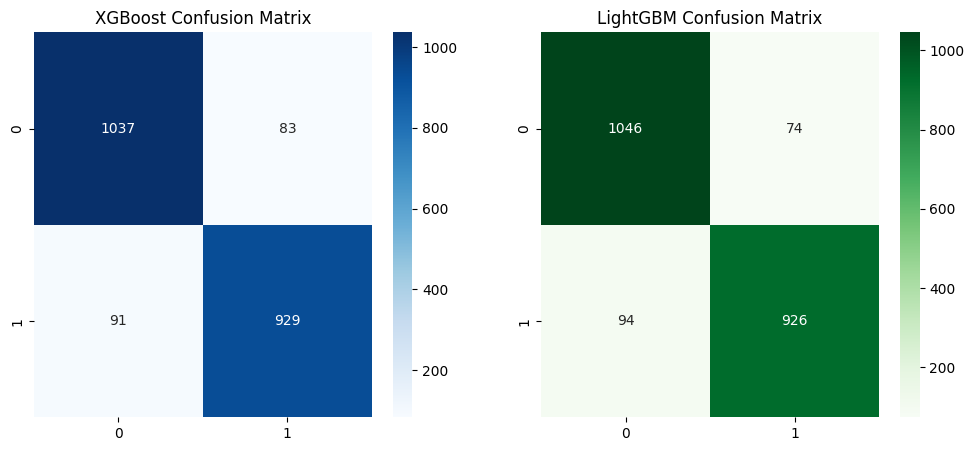

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# XGBoost
sns.heatmap(confusion_matrix(y_val, y_xgb_pred), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("XGBoost Confusion Matrix")

# LightGBM
sns.heatmap(confusion_matrix(y_val, y_lgb_pred), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("LightGBM Confusion Matrix")

plt.show()


## ROC-AUC Score

In [36]:
print("XGBoost ROC-AUC Score:", roc_auc_score(y_val, y_xgb_prob))
print("LightGBM ROC-AUC Score:", roc_auc_score(y_val, y_lgb_prob))


XGBoost ROC-AUC Score: 0.9752389705882354
LightGBM ROC-AUC Score: 0.9792935924369748


## Extract Feature Importance

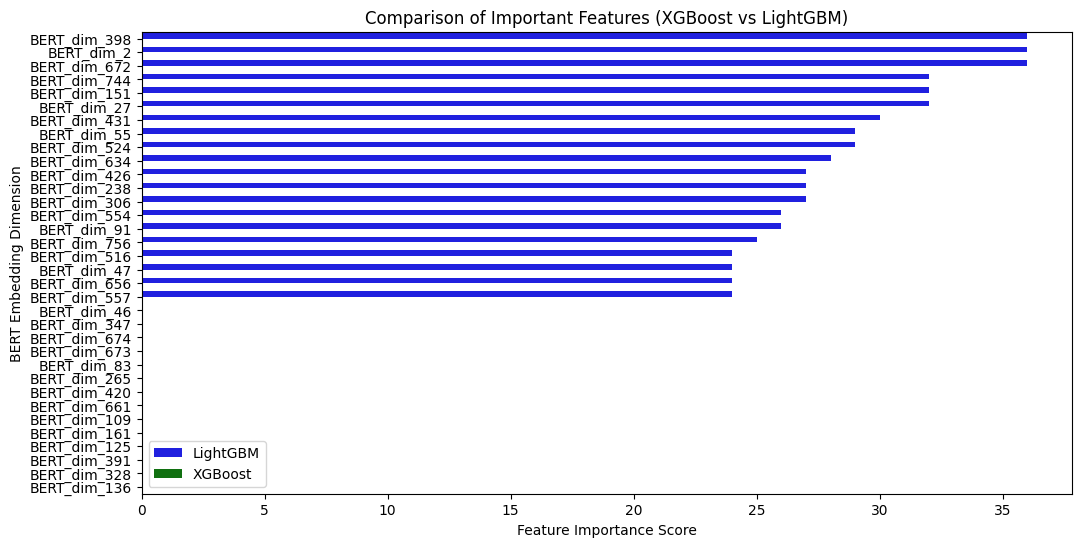

In [37]:
# Get feature importance from both models
xgb_importance = best_xgb.feature_importances_
lgb_importance = best_lgb.feature_importances_

# Get top 20 important features
xgb_sorted_idx = np.argsort(xgb_importance)[-20:]
lgb_sorted_idx = np.argsort(lgb_importance)[-20:]

# Create DataFrames for visualization
xgb_df = pd.DataFrame({
    "Feature": [f"BERT_dim_{i}" for i in xgb_sorted_idx],
    "Importance": xgb_importance[xgb_sorted_idx],
    "Model": "XGBoost"
})

lgb_df = pd.DataFrame({
    "Feature": [f"BERT_dim_{i}" for i in lgb_sorted_idx],
    "Importance": lgb_importance[lgb_sorted_idx],
    "Model": "LightGBM"
})

# Combine both
importance_df = pd.concat([xgb_df, lgb_df]).sort_values(by="Importance", ascending=False)

# Plot Feature Importance Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", hue="Model", data=importance_df, palette=["blue", "green"])
plt.xlabel("Feature Importance Score")
plt.ylabel("BERT Embedding Dimension")
plt.title("Comparison of Important Features (XGBoost vs LightGBM)")
plt.legend()
plt.show()

## Identify Unique Feature and Top Feature

In [38]:
# Convert to sets
xgb_top_features = set(xgb_df["Feature"])
lgb_top_features = set(lgb_df["Feature"])

# Find common and unique features
common_features = xgb_top_features.intersection(lgb_top_features)
xgb_unique_features = xgb_top_features - lgb_top_features
lgb_unique_features = lgb_top_features - xgb_top_features

# Print results
print(f"🔹 Common Features: {common_features}")
print(f"🔹 XGBoost Unique Features: {xgb_unique_features}")
print(f"🔹 LightGBM Unique Features: {lgb_unique_features}")


🔹 Common Features: {'BERT_dim_524', 'BERT_dim_672', 'BERT_dim_27', 'BERT_dim_744', 'BERT_dim_398', 'BERT_dim_2'}
🔹 XGBoost Unique Features: {'BERT_dim_46', 'BERT_dim_83', 'BERT_dim_328', 'BERT_dim_125', 'BERT_dim_136', 'BERT_dim_661', 'BERT_dim_347', 'BERT_dim_674', 'BERT_dim_391', 'BERT_dim_420', 'BERT_dim_673', 'BERT_dim_161', 'BERT_dim_265', 'BERT_dim_109'}
🔹 LightGBM Unique Features: {'BERT_dim_151', 'BERT_dim_516', 'BERT_dim_554', 'BERT_dim_426', 'BERT_dim_238', 'BERT_dim_756', 'BERT_dim_91', 'BERT_dim_306', 'BERT_dim_47', 'BERT_dim_634', 'BERT_dim_55', 'BERT_dim_557', 'BERT_dim_656', 'BERT_dim_431'}


## Visualize How Each Model Uses the Features

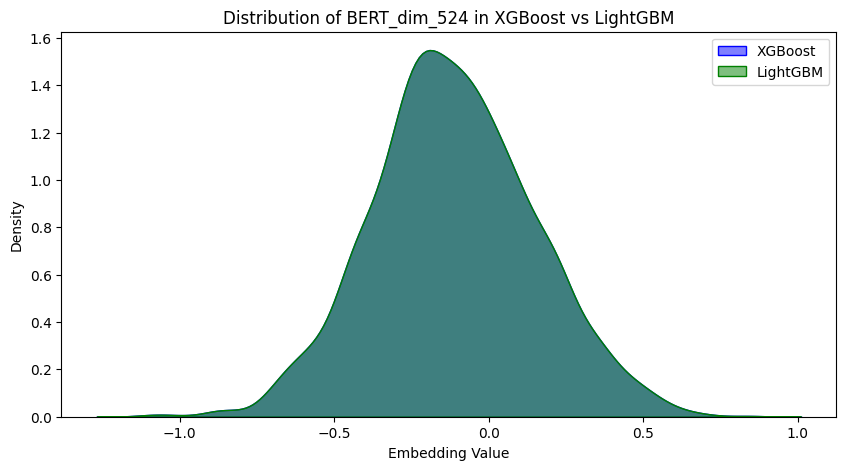

In [39]:
# Choose one of the most important features
feature_name = list(common_features)[0]  # Pick the first common feature

# Extract feature index
feature_idx = int(feature_name.split("_")[-1])

# Get values from dataset
xgb_values = X_val[:, feature_idx]
lgb_values = X_val[:, feature_idx]

# Plot distributions
plt.figure(figsize=(10, 5))
sns.kdeplot(xgb_values, label="XGBoost", fill=True, color="blue", alpha=0.5)
sns.kdeplot(lgb_values, label="LightGBM", fill=True, color="green", alpha=0.5)
plt.xlabel("Embedding Value")
plt.ylabel("Density")
plt.title(f"Distribution of {feature_name} in XGBoost vs LightGBM")
plt.legend()
plt.show()
